In [1]:
import os
import torch
from PIL import Image
from torchvision import transforms, datasets
from sklearn.model_selection import train_test_split
import shutil
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import time
import torchvision
from torchvision import models
from torch.utils.tensorboard import SummaryWriter 
import numpy as np
import time

if torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    print("MPS backend is not available.")


In [2]:
print(device)


mps


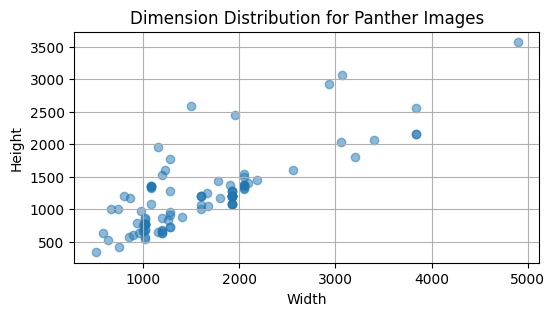

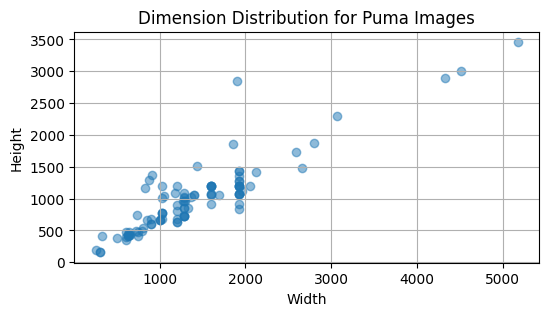

In [39]:
def get_image_dimensions(folder_name):
    dimensions = []
    files = os.listdir(folder_name)

    for filename in files:
        # Skip files like .DS_Store
        if filename.startswith('.'):
            continue
        file_path = os.path.join(folder_name, filename)
        with Image.open(file_path) as img:
            dimensions.append(img.size)  # (width, height)
            
    return dimensions

def plot_dimension_distribution(dimensions, title):
    widths, heights = zip(*dimensions)
    plt.figure(figsize=(6, 3))
    plt.scatter(widths, heights, alpha=0.5)
    plt.xlabel('Width')
    plt.ylabel('Height')
    plt.title(f'Dimension Distribution for {title}')
    plt.grid(True)
    plt.show()


Pa_dimensions = get_image_dimensions('data_new/Panther')
plot_dimension_distribution(Pa_dimensions, 'Panther Images')
Pu_dimensions = get_image_dimensions('data_new/Puma')
plot_dimension_distribution(Pu_dimensions, 'Puma Images')


In [3]:
from PIL import Image
import os

def check_image_modes(folder_name):
    #list of all files in the folder
    files = os.listdir(folder_name)
    # checking the mode
    for filename in files:
        if filename.startswith('.'):  # Skip files like .DS_Store
            continue

        file_path = os.path.join(folder_name, filename)
        with Image.open(file_path) as img:
            print(f"Image: {filename}, Mode: {img.mode}")

# Check image modes in both folders
check_image_modes('data_new/Panther')
check_image_modes('data_new/Puma')


Image: Panther_48.jpg, Mode: RGB
Image: Panther_74.jpg, Mode: RGB
Image: Panther_60.jpg, Mode: RGB
Image: Panther_61.jpg, Mode: RGB
Image: Panther_75.jpg, Mode: RGB
Image: Panther_49.jpg, Mode: RGB
Image: Panther_63.jpg, Mode: RGB
Image: Panther_77.jpg, Mode: RGB
Image: Panther_88.jpg, Mode: RGB
Image: Panther_89.jpg, Mode: RGB
Image: Panther_76.jpg, Mode: RGB
Image: Panther_62.jpg, Mode: RGB
Image: Panther_66.jpg, Mode: RGB
Image: Panther_72.jpg, Mode: RGB
Image: Panther_99.jpg, Mode: RGB
Image: Panther_98.jpg, Mode: RGB
Image: Panther_73.jpg, Mode: RGB
Image: Panther_67.jpg, Mode: RGB
Image: Panther_71.jpg, Mode: RGB
Image: Panther_65.jpg, Mode: RGB
Image: Panther_59.jpg, Mode: P
Image: Panther_58.jpg, Mode: RGB
Image: Panther_64.jpg, Mode: RGB
Image: Panther_70.jpg, Mode: RGB
Image: Panther_17.jpg, Mode: RGB
Image: Panther_16.jpg, Mode: RGB
Image: Panther_28.jpg, Mode: RGB
Image: Panther_14.jpg, Mode: RGB
Image: Panther_15.jpg, Mode: RGB
Image: Panther_29.jpg, Mode: RGB
Image: Panth

In [4]:
def get_image_paths(folder):
    """Get all image paths in the folder."""
    return [os.path.join(folder, filename) for filename in os.listdir(folder) if filename.endswith('.jpg')]

Pa_images = get_image_paths('data_new/Panther')
Pu_images = get_image_paths('data_new/Puma')
print(len(Pa_images))
print(len(Pu_images))

100
100


In [42]:

    
def save_images(train_files, test_files, class_name, base_dir):
    """Save train and test tensors in respective directories."""
    # Creating train and test directories
    train_dir = os.path.join(base_dir, 'train', class_name)
    test_dir = os.path.join(base_dir, 'test', class_name)
    
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)
    # Saveing training set
    for i, file in enumerate(train_files):
        try:
            img = Image.open(file)  # Open the image using PIL
            if img.mode not in ("RGB", "L"):
               img = img.convert("RGB")
            img.save(os.path.join(train_dir, f'{class_name}_{i}.jpg'))  # Save the image as a PNG
        except Exception as e:
            print(f"Error processing {file}: {e}")
    
    # Saving test set 
    for i, file in enumerate(test_files):
        try:
            img = Image.open(file)  # Open the image using PIL
            if img.mode not in ("RGB"):
               img = img.convert("RGB")            
            img.save(os.path.join(test_dir, f'{class_name}_{i}.jpg'))  # Save the image as a PNG
        except Exception as e:
            print(f"Error processing {file}: {e}")


def process_and_save_images(base_dir):
    """Processing images from both classes and saving them in the train/test folders."""  
 
    class1_train, class1_test = train_test_split(Pa_images, test_size=0.2, random_state=42)
    class2_train, class2_test = train_test_split(Pu_images, test_size=0.2, random_state=42)
    
    # Save the images in the train/test directories
    save_images(class1_train, class1_test, 'Panther', base_dir)
    save_images(class2_train, class2_test, 'Puma', base_dir)






In [43]:
process_and_save_images('data_new')


#
#
#
#
#
#
#
#
#

Panther Images----->


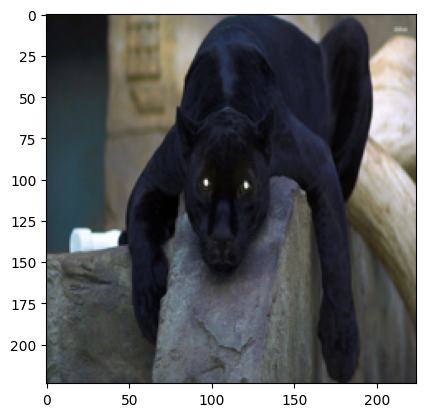

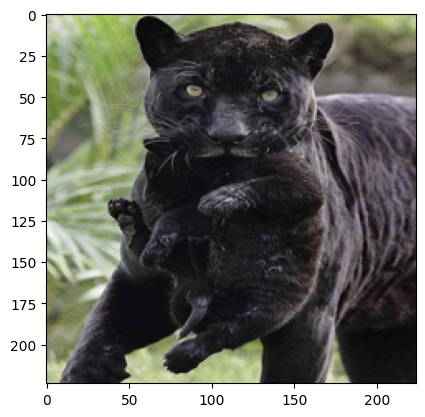

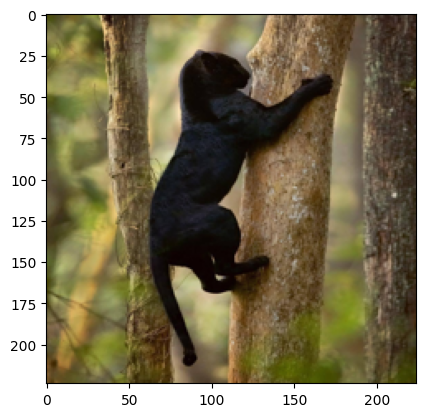

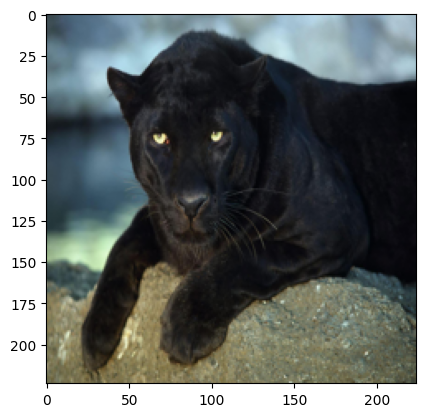

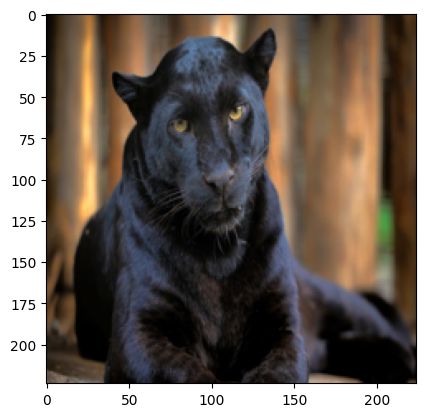

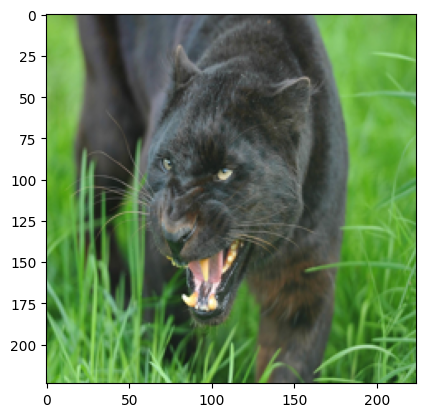

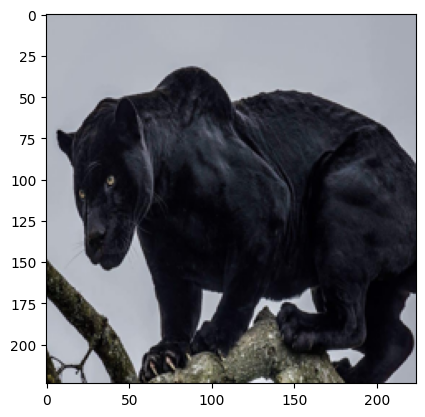

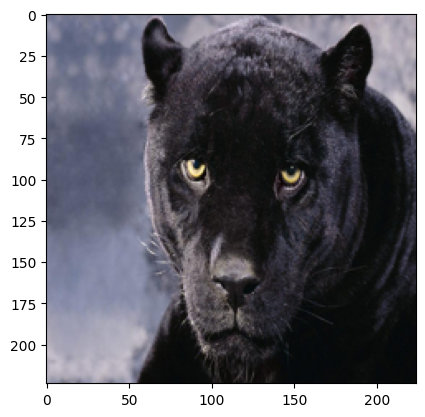

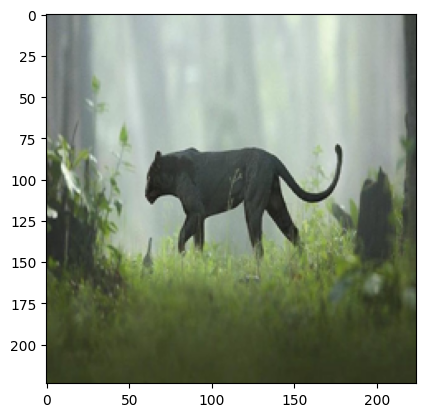

Puma Images----->


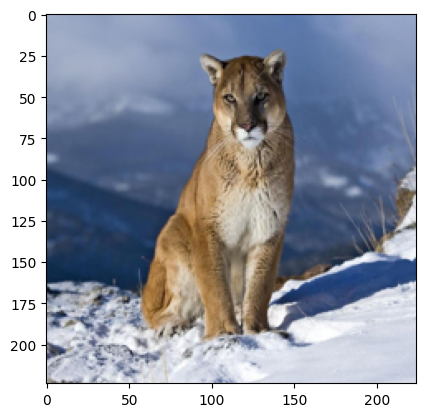

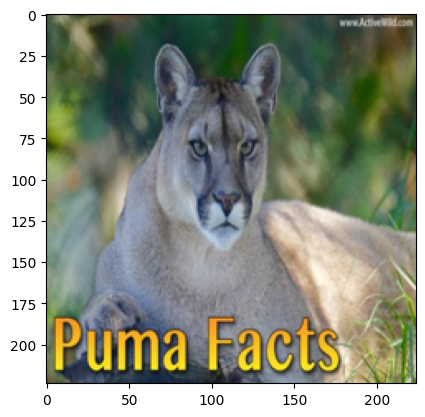

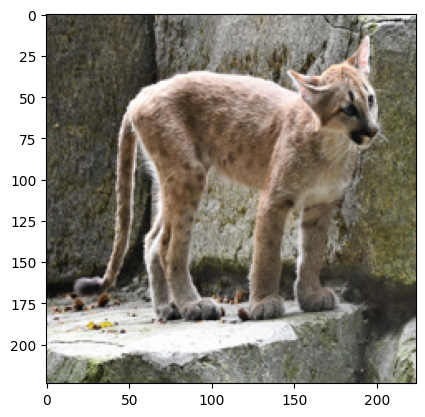

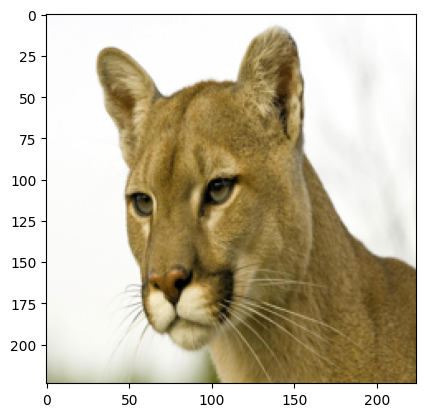

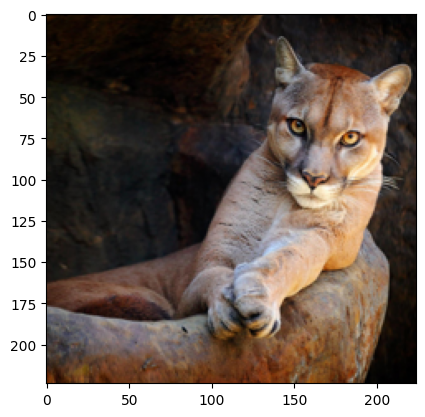

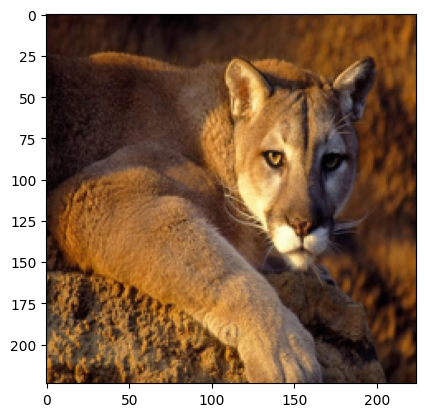

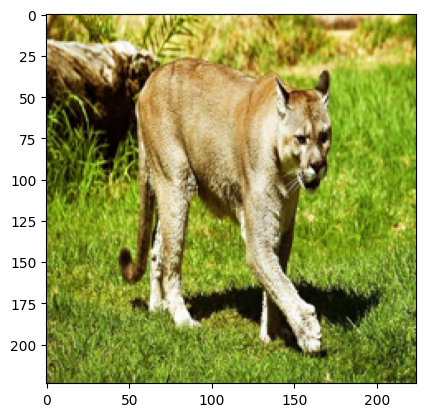

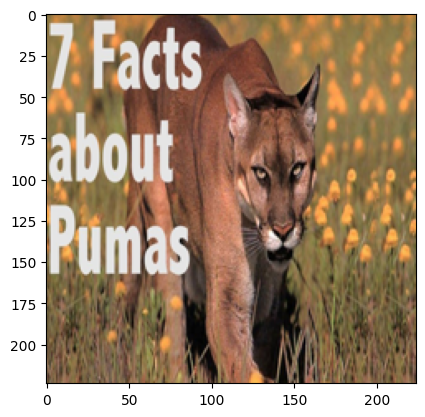

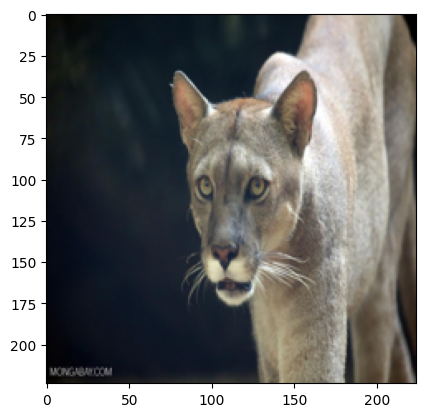

In [71]:
Anims = ["Panther","Puma"]
for anim in Anims :
    print(f"{anim} Images----->")
    for i in range(1,10):
        pth = f"data_new/train/{anim}/{anim}_{i}.jpg"
        with Image.open(pth) as img:
            img = img.resize((224,224
                             ))
            plt.imshow(img)
            plt.show()
        








#
#
#
#
#
#
#

In [3]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),  # This should come before Normalize
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


aug_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),  # Random crop and resize to 224x224
    transforms.RandomHorizontalFlip(),  # Random horizontal flip
    transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.2),  # Random color jitter
    transforms.RandomRotation(20),  # Random rotation
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])




train_dataset = datasets.ImageFolder(root='data_new/train', transform=transform)
train_loader = DataLoader(
    dataset=train_dataset, batch_size=40, shuffle=True
)
train_dataset_aug = datasets.ImageFolder(root='data_new/train', transform=aug_transform)
train_loader_aug = DataLoader(
    dataset=train_dataset, batch_size=40, shuffle=True
)

In [4]:
class_to_idx = train_dataset.class_to_idx
print("Class to index mapping:", class_to_idx)
idx_to_class = {v: k for k, v in class_to_idx.items()}
print("index to Class mapping:", idx_to_class)
print(idx_to_class[1])

Class to index mapping: {'Panther': 0, 'Puma': 1}
index to Class mapping: {0: 'Panther', 1: 'Puma'}
Puma


In [5]:



test_dataset = datasets.ImageFolder(root='data_new/test',transform=transform)
test_loader = DataLoader(test_dataset , batch_size = 40, shuffle=False)

#
#
#
#
#
#
# 1Block And 3Block VGG

In [6]:
class VGG1B(nn.Module):
    def __init__(self):
        super(VGG1B, self).__init__()
        self.conv = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(32 * 112 * 112, 128) 
        self.fc2 = nn.Linear(128, 1) 

    def forward(self, x):
        x = torch.relu(self.conv(x))
        x = self.pool(x)
        x = x.view(x.size(0), -1)  # Flatten the output from the pooling layer
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))  # Use sigmoid for binary classification
        return x


class VGG3B(nn.Module):
    def __init__(self):
        super(VGG3B, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)

        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(128 * 28 * 28, 128)  
        self.fc2 = nn.Linear(128, 1)  
        
    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = self.pool(x)
        x = torch.relu(self.conv2(x))
        x = self.pool(x)
        x = torch.relu(self.conv3(x))
        x = self.pool(x)    
        x = x.view(x.size(0), -1)  # Flatten the output from the pooling layer
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))  # Use sigmoid for binary classification
        return x


In [7]:
for batch_id, (data, targets) in enumerate(train_loader):
    print(f'batch_no : {batch_id}-----> batch_size : {data.shape}      targets  = {targets.shape}')

batch_no : 0-----> batch_size : torch.Size([40, 3, 224, 224])      targets  = torch.Size([40])
batch_no : 1-----> batch_size : torch.Size([40, 3, 224, 224])      targets  = torch.Size([40])
batch_no : 2-----> batch_size : torch.Size([40, 3, 224, 224])      targets  = torch.Size([40])
batch_no : 3-----> batch_size : torch.Size([40, 3, 224, 224])      targets  = torch.Size([40])


In [8]:

def Train_Test(model_class, file_name): 
        model = model_class()
        model.to(device)
        for name, param in model.named_parameters():
                print(f"{name}: {param.size()}")  
        
        # To get total parameters
        total_params = sum(p.numel() for p in model.parameters())
        print(f"Total number of parameters: {total_params}")


        criterion = nn.BCELoss() 
        optimizer = optim.SGD(model.parameters(), lr=0.0001, momentum=0.9)
        it_train = 0
        losses = []
        accuracies = []
        test_accuracies = []
        epochs = 10
        epoch_times=[]
        writer = SummaryWriter(f'runs/final/{file_name}')
        
        for ep in range(epochs):
            model.train()
            correct_t = 0
            total_size = 0.0
            start_time = time.time() 
        
            for batch_idx, (data, targets) in enumerate(train_loader):
        
        
                data = data.to(device)
                targets = targets.to(device).float()  
                
                optimizer.zero_grad()
                
                scores = model(data)  
                # print(f'output : {scores}-----> truth : {targets}')
                
                loss = criterion(scores.squeeze(), targets) 
                loss.backward()
                optimizer.step()
                losses.append(loss.item())
        
        
                targets = targets.view_as(scores)
                correct = ((scores>0.5) == targets).sum().item()
                # print(correct)
                correct_t+=correct
                acc_batch= float(correct)/float(data.shape[0])
                accuracies.append(acc_batch)
                total_size+= float(data.shape[0])
                # print(f'Batch : {batch_idx}------> Accuracy : {acc_batch}')
                writer.add_scalar('Training Loss vs Iteration', loss.item(), global_step = it_train)
                writer.add_scalar('Training Accuracy vs Iteration', acc_batch, global_step = it_train)
                it_train+=1
        
        
                model.eval()
                corr_test_t=0
                total_test = 0
                with torch.no_grad():       
                        for idx, (inputs, labels) in enumerate(test_loader):
                            inputs = inputs.to(device)
                            labels = labels.to(device).float()
                            
                            outputs = model(inputs)
                        
                            labels = labels.view_as(outputs)
                            predictions = (outputs > 0.5).int().tolist()
                            corr_test = ((outputs>0.5) == labels).sum().item()
                            corr_test_t+=corr_test
                            total_test+= float(inputs.shape[0])
                            # print(f'test output{outputs}  and  labels = {labels}------> test correct = {corr_test}')
                            inputs = inputs.cpu()
                            # print(predictions[0][0])
                            
        
                            # if ep==9 : 
                              # for i in range(len(inputs)):
                          
                                    # img_grid = torchvision.utils.make_grid(inputs[i])
                                    # predicted_class = predictions[i][0]
                                    # writer.add_image(f'Test_Image_{idx}_{i}_Predicted_Class_{idx_to_class[predicted_class]}', img_grid)       
            
        
        

                # print(f'test batch no.:{idx}-------> Correct = {corr_test_t}, total_test = {total_test}')
                test_accuracies.append(float(corr_test_t)/total_test)
                writer.add_scalar('Testing Accuracy vs Iteration', float(corr_test_t)/total_test, global_step = it_train)
            end_time = time.time()  
            epoch_time = end_time-start_time
            epoch_times.append(epoch_time)
            print(f'Epoch no.{ep+1} training accuracy   : {float(correct_t)/total_size}\n')
            
        torch.save(model.state_dict(), f'{file_name}_model.pth')        
        writer.close()       
        return [accuracies, losses, test_accuracies, epoch_times, total_params]
        

In [9]:
VGG1B_hist = Train_Test(VGG1B,"VGG1B_40")

conv.weight: torch.Size([32, 3, 3, 3])
conv.bias: torch.Size([32])
fc1.weight: torch.Size([128, 401408])
fc1.bias: torch.Size([128])
fc2.weight: torch.Size([1, 128])
fc2.bias: torch.Size([1])
Total number of parameters: 51381377
Epoch no.1 training accuracy   : 0.4

Epoch no.2 training accuracy   : 0.61875

Epoch no.3 training accuracy   : 0.775

Epoch no.4 training accuracy   : 0.88125

Epoch no.5 training accuracy   : 0.90625

Epoch no.6 training accuracy   : 0.91875

Epoch no.7 training accuracy   : 0.93125

Epoch no.8 training accuracy   : 0.9625

Epoch no.9 training accuracy   : 0.9625

Epoch no.10 training accuracy   : 0.9625



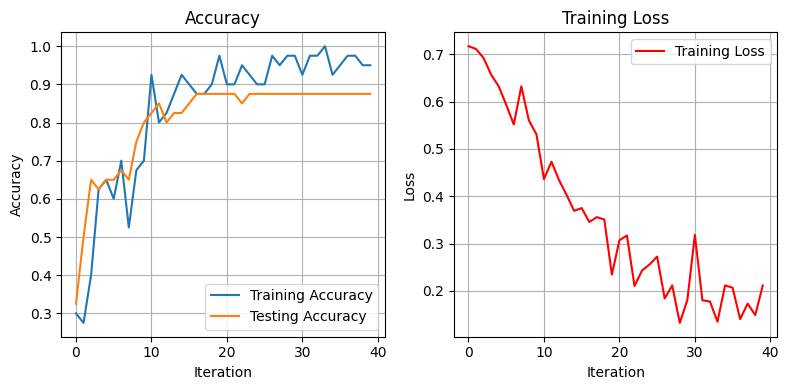

Training Accuracy : 0.95
Training Loss : 0.21150735020637512
Testing Accuracy : 0.875
Training time : 54.11345291137695
No. of Parameters : 51381377


In [24]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

axs[0].plot(VGG1B_hist[0], label='Training Accuracy')
axs[0].plot(VGG1B_hist[2], label='Testing Accuracy')
axs[0].set_title('Accuracy')
axs[0].set_xlabel('Iteration')
axs[0].set_ylabel('Accuracy')
axs[0].legend()

axs[1].plot(VGG1B_hist[1], label='Training Loss', color='r')
axs[1].set_title('Training Loss')
axs[1].set_xlabel('Iteration')
axs[1].set_ylabel('Loss')
axs[1].legend()
axs[0].grid(True)
axs[1].grid(True)
# axs[1, 0].plot(VGG1B_hist[2], label='Test Accuracy', color='g')
# axs[1, 0].set_title('Test Accuracy')
# axs[1, 0].set_xlabel('Epoch')
# axs[1, 0].set_ylabel('Accuracy')
# axs[1, 0].legend()

# Adjust layout

plt.tight_layout()
plt.show()
print(f"Training Accuracy : {VGG1B_hist[0][-1]}")
print(f"Training Loss : {VGG1B_hist[1][-1]}")
print(f"Testing Accuracy : {VGG1B_hist[2][-1]}")
print(f"Training time : {sum(VGG1B_hist[3])}")
print(f"No. of Parameters : {VGG1B_hist[4]}")

#
#


In [12]:
VGG3B_hist = Train_Test(VGG3B,"VGG3B_40")

conv1.weight: torch.Size([32, 3, 3, 3])
conv1.bias: torch.Size([32])
conv2.weight: torch.Size([64, 32, 3, 3])
conv2.bias: torch.Size([64])
conv3.weight: torch.Size([128, 64, 3, 3])
conv3.bias: torch.Size([128])
fc1.weight: torch.Size([128, 100352])
fc1.bias: torch.Size([128])
fc2.weight: torch.Size([1, 128])
fc2.bias: torch.Size([1])
Total number of parameters: 12938561
Epoch no.1 training accuracy   : 0.5

Epoch no.2 training accuracy   : 0.5

Epoch no.3 training accuracy   : 0.5

Epoch no.4 training accuracy   : 0.5

Epoch no.5 training accuracy   : 0.50625

Epoch no.6 training accuracy   : 0.51875

Epoch no.7 training accuracy   : 0.525

Epoch no.8 training accuracy   : 0.5375

Epoch no.9 training accuracy   : 0.5875

Epoch no.10 training accuracy   : 0.625



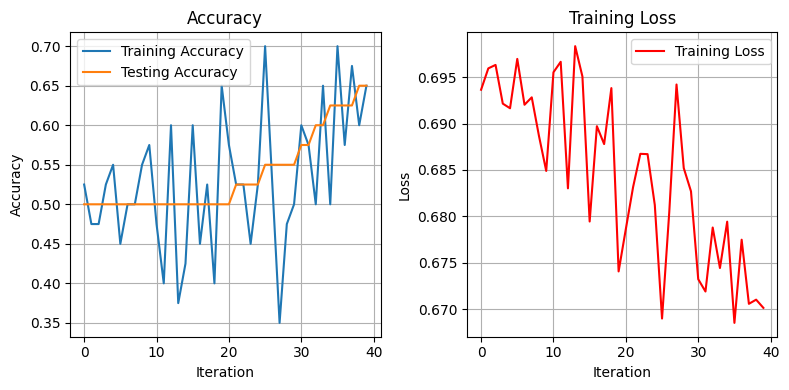

Training Accuracy : 0.65
Training Loss : 0.6701499223709106
Testing Accuracy : 0.65
Training time : 58.91561484336853
No. of Parameters : 12938561


In [25]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

axs[0].plot(VGG3B_hist[0], label='Training Accuracy')
axs[0].plot(VGG3B_hist[2], label='Testing Accuracy')
axs[0].set_title('Accuracy')
axs[0].set_xlabel('Iteration')
axs[0].set_ylabel('Accuracy')
axs[0].legend()

axs[1].plot(VGG3B_hist[1], label='Training Loss', color='r')
axs[1].set_title('Training Loss')
axs[1].set_xlabel('Iteration')
axs[1].set_ylabel('Loss')
axs[1].legend()
axs[0].grid(True)
axs[1].grid(True)


plt.tight_layout()
plt.show()

print(f"Training Accuracy : {VGG3B_hist[0][-1]}")
print(f"Training Loss : {VGG3B_hist[1][-1]}")
print(f"Testing Accuracy : {VGG3B_hist[2][-1]}")
print(f"Training time : {sum(VGG3B_hist[3])}")
print(f"No. of Parameters : {VGG3B_hist[4]}")

#
#
#
#
#
#
# 3 BLock VGG with Data Augmentation

In [27]:

def Train_Test_Aug(model_class, file_name): 
        model = model_class()
        model.to(device)
        for name, param in model.named_parameters():
                print(f"{name}: {param.size()}")  
        
        # To get total parameters
        total_params = sum(p.numel() for p in model.parameters())
        print(f"Total number of parameters: {total_params}")


        criterion = nn.BCELoss() 
        optimizer = optim.SGD(model.parameters(), lr=0.0001, momentum=0.9)
        it_train = 0
        losses = []
        accuracies = []
        test_accuracies = []
        epochs = 10
        epoch_times=[]
        writer = SummaryWriter(f'runs/final/{file_name}_aug')
        
        for ep in range(epochs):
            model.train()
            correct_t = 0
            total_size = 0.0
            start_time = time.time() 
        
            for batch_idx, (data, targets) in enumerate(train_loader_aug):
        
        
                data = data.to(device)
                targets = targets.to(device).float()  
                
                optimizer.zero_grad()
                
                scores = model(data)  
                # print(f'output : {scores}-----> truth : {targets}')
                
                loss = criterion(scores.squeeze(), targets) 
                loss.backward()
                optimizer.step()
                losses.append(loss.item())
        
        
                targets = targets.view_as(scores)
                correct = ((scores>0.5) == targets).sum().item()
                # print(correct)
                correct_t+=correct
                acc_batch= float(correct)/float(data.shape[0])
                accuracies.append(acc_batch)
                total_size+= float(data.shape[0])
                # print(f'Batch : {batch_idx}------> Accuracy : {acc_batch}')
                writer.add_scalar('Training Loss vs Iteration', loss.item(), global_step = it_train)
                writer.add_scalar('Training Accuracy vs Iteration', acc_batch, global_step = it_train)
                it_train+=1
        
        
                model.eval()
                corr_test_t=0
                total_test = 0
                with torch.no_grad():       
                        for idx, (inputs, labels) in enumerate(test_loader):
                            inputs = inputs.to(device)
                            labels = labels.to(device).float()
                            
                            outputs = model(inputs)
                        
                            labels = labels.view_as(outputs)
                            predictions = (outputs > 0.5).int().tolist()
                            corr_test = ((outputs>0.5) == labels).sum().item()
                            corr_test_t+=corr_test
                            total_test+= float(inputs.shape[0])
                            # print(f'test output{outputs}  and  labels = {labels}------> test correct = {corr_test}')
                            inputs = inputs.cpu()
                            # print(predictions[0][0])      
            
        
        
                end_time = time.time()  
                epoch_time = end_time-start_time
                epoch_times.append(epoch_time)
                # print(f'test batch no.:{idx}-------> Correct = {corr_test_t}, total_test = {total_test}')
                test_accuracies.append(float(corr_test_t)/total_test)
                writer.add_scalar('Testing Accuracy vs Iteration', float(corr_test_t)/total_test, global_step = it_train)
                
            print(f'Epoch no.{ep+1} training accuracy   : {float(correct_t)/total_size}\n')
            
        torch.save(model.state_dict(), f'{file_name}_aug_model.pth')                  
        writer.close()       
        return [accuracies, losses, test_accuracies, epoch_times, total_params]
        
        

In [28]:
VGG3B_aug_hist = Train_Test_Aug(VGG3B,"VGG3B_40")

conv1.weight: torch.Size([32, 3, 3, 3])
conv1.bias: torch.Size([32])
conv2.weight: torch.Size([64, 32, 3, 3])
conv2.bias: torch.Size([64])
conv3.weight: torch.Size([128, 64, 3, 3])
conv3.bias: torch.Size([128])
fc1.weight: torch.Size([128, 100352])
fc1.bias: torch.Size([128])
fc2.weight: torch.Size([1, 128])
fc2.bias: torch.Size([1])
Total number of parameters: 12938561
Epoch no.1 training accuracy   : 0.5

Epoch no.2 training accuracy   : 0.5

Epoch no.3 training accuracy   : 0.5

Epoch no.4 training accuracy   : 0.75

Epoch no.5 training accuracy   : 0.84375

Epoch no.6 training accuracy   : 0.775

Epoch no.7 training accuracy   : 0.6625

Epoch no.8 training accuracy   : 0.64375

Epoch no.9 training accuracy   : 0.625

Epoch no.10 training accuracy   : 0.6125



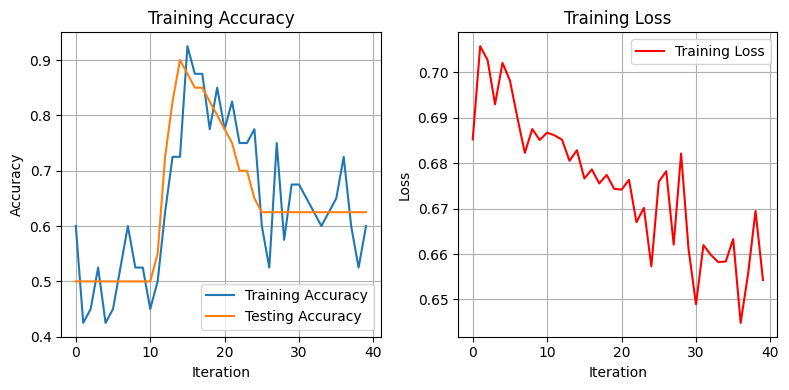

Training Accuracy : 0.6
Training Loss : 0.6542922258377075
Testing Accuracy : 0.625
Training time : 141.28253841400146
No. of Parameters : 12938561


In [30]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

axs[0].plot(VGG3B_aug_hist[0], label='Training Accuracy')
axs[0].plot(VGG3B_aug_hist[2], label='Testing Accuracy')
axs[0].set_title('Training Accuracy')
axs[0].set_xlabel('Iteration')
axs[0].set_ylabel('Accuracy')
axs[0].legend()

axs[1].plot(VGG3B_aug_hist[1], label='Training Loss', color='r')
axs[1].set_title('Training Loss')
axs[1].set_xlabel('Iteration')
axs[1].set_ylabel('Loss')
axs[1].legend()
axs[0].grid(True)
axs[1].grid(True)
# axs[1, 0].plot(VGG1B_hist[2], label='Test Accuracy', color='g')
# axs[1, 0].set_title('Test Accuracy')
# axs[1, 0].set_xlabel('Epoch')
# axs[1, 0].set_ylabel('Accuracy')
# axs[1, 0].legend()

# Adjust layout

plt.tight_layout()
plt.show()
print(f"Training Accuracy : {VGG3B_aug_hist[0][-1]}")
print(f"Training Loss : {VGG3B_aug_hist[1][-1]}")
print(f"Testing Accuracy : {VGG3B_aug_hist[2][-1]}")
print(f"Training time : {sum(VGG3B_aug_hist[3])}")
print(f"No. of Parameters : {VGG3B_aug_hist[4]}")

#
#
#
#
# VGG16 with all layers tuned

In [33]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torch.utils.tensorboard import SummaryWriter
import time
from PIL import Image

# Load the pre-trained VGG16 model
vgg16 = models.vgg16(pretrained=True)


vgg16.classifier[6] = nn.Linear(in_features=4096, out_features=1)  # 1 output for binary classification






for param in vgg16.parameters():
    param.requires_grad = True

train_loader_VGG = DataLoader(
    dataset=train_dataset, batch_size=40, shuffle=True)



In [34]:

def TL_Train_Test(model, file_name): 
        # model = model_class()
        model.to(device)
        for name, param in model.named_parameters():
                print(f"{name}: {param.size()}")  
        
        # To get total parameters
        total_params = sum(p.numel() for p in model.parameters())
        print(f"Total number of parameters: {total_params}")


        criterion = nn.BCEWithLogitsLoss()
        optimizer = optim.SGD(model.parameters(), lr=0.0001, momentum=0.9)
        it_train = 0
        losses = []
        accuracies = []
        test_accuracies = []
        epochs = 10
        epoch_times=[]
        writer = SummaryWriter(f'runs/final/{file_name}')
        
        for ep in range(epochs):
            model.train()
            correct_t = 0
            total_size = 0.0
            start_time = time.time() 
        
            for batch_idx, (data, targets) in enumerate(train_loader_VGG):
        
        
                data = data.to(device)
                targets = targets.to(device).float()  
                
                optimizer.zero_grad()
                
                scores = model(data)  
                # print(f'output : {scores}-----> truth : {targets}')
                
                loss = criterion(scores.squeeze(), targets) 
                loss.backward()
                optimizer.step()
                losses.append(loss.item())
        
        
                targets = targets.view_as(scores)
                correct = ((scores>0.5) == targets).sum().item()
                # print(correct)
                correct_t+=correct
                acc_batch= float(correct)/float(data.shape[0])
                accuracies.append(acc_batch)
                total_size+= float(data.shape[0])
                # print(f'Batch : {batch_idx}------> Accuracy : {acc_batch}')
                writer.add_scalar('Training Loss vs Iteration', loss.item(), global_step = it_train)
                writer.add_scalar('Training Accuracy vs Iteration', acc_batch, global_step = it_train)
                it_train+=1
        
        
                model.eval()
                corr_test_t=0
                total_test = 0
                with torch.no_grad():       
                        for idx, (inputs, labels) in enumerate(test_loader):
                            inputs = inputs.to(device)
                            labels = labels.to(device).float()
                            
                            outputs = model(inputs)
                        
                            labels = labels.view_as(outputs)
                            predictions = (outputs > 0.5).int().tolist()
                            corr_test = ((outputs>0.5) == labels).sum().item()
                            corr_test_t+=corr_test
                            total_test+= float(inputs.shape[0])
                            # print(f'test output{outputs}  and  labels = {labels}------> test correct = {corr_test}')
                
                end_time = time.time()  
                epoch_time = end_time-start_time
                epoch_times.append(epoch_time) 
                # print(f'test batch no.:{idx}-------> Correct = {corr_test_t}, total_test = {total_test}')
                test_accuracies.append(float(corr_test_t)/total_test)
                writer.add_scalar('Testing Accuracy vs Iteration', float(corr_test_t)/total_test, global_step = it_train)
            torch.mps.empty_cache()        
            print(f'Epoch no.{ep+1} training accuracy   : {float(correct_t)/total_size}\n')
            
        torch.save(model.state_dict(), f'{file_name}_model.pth')        
        writer.close()       
        return [accuracies, losses, test_accuracies, epoch_times, total_params]
        

In [113]:
VGG16_all_layers_hist = TL_Train_Test(vgg16, "VGG16_all_layers_trainable")

features.0.weight: torch.Size([64, 3, 3, 3])
features.0.bias: torch.Size([64])
features.2.weight: torch.Size([64, 64, 3, 3])
features.2.bias: torch.Size([64])
features.5.weight: torch.Size([128, 64, 3, 3])
features.5.bias: torch.Size([128])
features.7.weight: torch.Size([128, 128, 3, 3])
features.7.bias: torch.Size([128])
features.10.weight: torch.Size([256, 128, 3, 3])
features.10.bias: torch.Size([256])
features.12.weight: torch.Size([256, 256, 3, 3])
features.12.bias: torch.Size([256])
features.14.weight: torch.Size([256, 256, 3, 3])
features.14.bias: torch.Size([256])
features.17.weight: torch.Size([512, 256, 3, 3])
features.17.bias: torch.Size([512])
features.19.weight: torch.Size([512, 512, 3, 3])
features.19.bias: torch.Size([512])
features.21.weight: torch.Size([512, 512, 3, 3])
features.21.bias: torch.Size([512])
features.24.weight: torch.Size([512, 512, 3, 3])
features.24.bias: torch.Size([512])
features.26.weight: torch.Size([512, 512, 3, 3])
features.26.bias: torch.Size([51

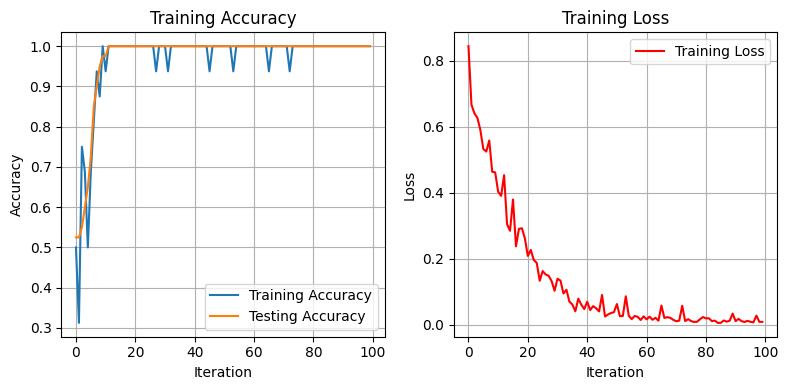

In [114]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

axs[0].plot(VGG16_all_layers_hist[0], label='Training Accuracy')
axs[0].plot(VGG16_all_layers_hist[2], label='Testing Accuracy')
axs[0].set_title('Training Accuracy')
axs[0].set_xlabel('Iteration')
axs[0].set_ylabel('Accuracy')
axs[0].legend()

axs[1].plot(VGG16_all_layers_hist[1], label='Training Loss', color='r')
axs[1].set_title('Training Loss')
axs[1].set_xlabel('Iteration')
axs[1].set_ylabel('Loss')
axs[1].legend()
axs[0].grid(True)
axs[1].grid(True)
# axs[1, 0].plot(VGG1B_hist[2], label='Test Accuracy', color='g')
# axs[1, 0].set_title('Test Accuracy')
# axs[1, 0].set_xlabel('Epoch')
# axs[1, 0].set_ylabel('Accuracy')
# axs[1, 0].legend()

# Adjust layout

plt.tight_layout()
plt.show()

#
#
#
#
# Transfer Learning using VGG16  (Only MLP layers tuned)

In [18]:

vgg16_mlp = models.vgg16(pretrained=True)

# Freeze the convolutional layers
for param in vgg16_mlp.features.parameters():
    param.requires_grad = False


torch.mps.empty_cache()
train_loader_VGG = DataLoader(
    dataset=train_dataset, batch_size=40, shuffle=True)

/opt/miniconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/miniconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [19]:
# Get the number of input features for the last fully connected layer
num_features = vgg16_mlp.classifier[6].in_features

vgg16_mlp.classifier[6] = nn.Linear(num_features, 1)


In [20]:

def TL_Train_Test(model, file_name): 
        # model = model_class()
        model.to(device)
        total_params = 0
        for name, param in model.named_parameters():
            if param.requires_grad:
                    print(f"{name}: {param.size()}") 
                    total_params += param.numel()
        # To get total parameters
        # total_params = sum(p.numel() for p in model.parameters())
        print(f"Total number of parameters: {total_params}")


        criterion = nn.BCEWithLogitsLoss()
        optimizer = optim.SGD(model.parameters(), lr=0.0001, momentum=0.9)
        it_train = 0
        losses = []
        accuracies = []
        test_accuracies = []
        epochs = 10
        epoch_times=[]
        writer = SummaryWriter(f'runs/final/{file_name}')
        
        for ep in range(epochs):
            model.train()
            correct_t = 0
            total_size = 0.0
            start_time = time.time() 
        
            for batch_idx, (data, targets) in enumerate(train_loader_VGG):
        
        
                data = data.to(device)
                targets = targets.to(device).float()  
                
                optimizer.zero_grad()
                
                scores = model(data)  
                # print(f'output : {scores}-----> truth : {targets}')
                
                loss = criterion(scores.squeeze(), targets) 
                loss.backward()
                optimizer.step()
                losses.append(loss.item())
        
        
                targets = targets.view_as(scores)
                correct = ((scores>0.5) == targets).sum().item()
                # print(correct)
                correct_t+=correct
                acc_batch= float(correct)/float(data.shape[0])
                accuracies.append(acc_batch)
                total_size+= float(data.shape[0])
                # print(f'Batch : {batch_idx}------> Accuracy : {acc_batch}')
                writer.add_scalar('Training Loss vs Iteration', loss.item(), global_step = it_train)
                writer.add_scalar('Training Accuracy vs Iteration', acc_batch, global_step = it_train)
                it_train+=1
        
        
                model.eval()
                corr_test_t=0
                total_test = 0
                with torch.no_grad():       
                        for idx, (inputs, labels) in enumerate(test_loader):
                            inputs = inputs.to(device)
                            labels = labels.to(device).float()
                            
                            outputs = model(inputs)
                        
                            labels = labels.view_as(outputs)
                            predictions = (outputs > 0.5).int().tolist()
                            corr_test = ((outputs>0.5) == labels).sum().item()
                            corr_test_t+=corr_test
                            total_test+= float(inputs.shape[0])
                            # print(f'test output{outputs}  and  labels = {labels}------> test correct = {corr_test}')
                            inputs = inputs.cpu()

                
                end_time = time.time()  
                epoch_time = end_time-start_time
                epoch_times.append(epoch_time)
                # print(f'test batch no.:{idx}-------> Correct = {corr_test_t}, total_test = {total_test}')
                test_accuracies.append(float(corr_test_t)/total_test)
                writer.add_scalar('Testing Accuracy vs Iteration', float(corr_test_t)/total_test, global_step = it_train)
            torch.mps.empty_cache()        
            print(f'Epoch no.{ep+1} training accuracy   : {float(correct_t)/total_size}\n')
            
        torch.save(model.state_dict(), f'{file_name}_model.pth')        
        writer.close()       
        return [accuracies, losses, test_accuracies, epoch_times, total_params]


VGG16_MLP_hist = TL_Train_Test(vgg16_mlp, "VGG_16_40_mlp_tuned")

classifier.0.weight: torch.Size([4096, 25088])
classifier.0.bias: torch.Size([4096])
classifier.3.weight: torch.Size([4096, 4096])
classifier.3.bias: torch.Size([4096])
classifier.6.weight: torch.Size([1, 4096])
classifier.6.bias: torch.Size([1])
Total number of parameters: 119549953
Epoch no.1 training accuracy   : 0.49375

Epoch no.2 training accuracy   : 0.5625

Epoch no.3 training accuracy   : 0.9

Epoch no.4 training accuracy   : 0.95625

Epoch no.5 training accuracy   : 0.99375

Epoch no.6 training accuracy   : 1.0

Epoch no.7 training accuracy   : 1.0

Epoch no.8 training accuracy   : 0.99375

Epoch no.9 training accuracy   : 0.99375

Epoch no.10 training accuracy   : 0.99375



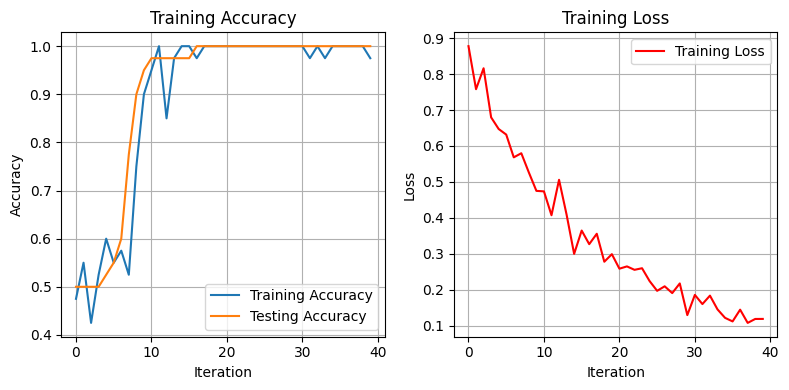

Training Accuracy : 0.975
Training Loss : 0.11839500814676285
Testing Accuracy : 1.0
Training time : 290.69995379447937
No. of Parameters : 119549953


In [23]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

axs[0].plot(VGG16_MLP_hist[0], label='Training Accuracy')
axs[0].plot(VGG16_MLP_hist[2], label='Testing Accuracy')
axs[0].set_title('Training Accuracy')
axs[0].set_xlabel('Iteration')
axs[0].set_ylabel('Accuracy')
axs[0].legend()

axs[1].plot(VGG16_MLP_hist[1], label='Training Loss', color='r')
axs[1].set_title('Training Loss')
axs[1].set_xlabel('Iteration')
axs[1].set_ylabel('Loss')
axs[1].legend()
axs[0].grid(True)
axs[1].grid(True)
# axs[1, 0].plot(VGG1B_hist[2], label='Test Accuracy', color='g')
# axs[1, 0].set_title('Test Accuracy')
# axs[1, 0].set_xlabel('Epoch')
# axs[1, 0].set_ylabel('Accuracy')
# axs[1, 0].legend()

# Adjust layout

plt.tight_layout()
plt.show()


print(f"Training Accuracy : {VGG16_MLP_hist[0][-1]}")
print(f"Training Loss : {VGG16_MLP_hist[1][-1]}")
print(f"Testing Accuracy : {VGG16_MLP_hist[2][-1]}")
print(f"Training time : {sum(VGG16_MLP_hist[3])}")
print(f"No. of Parameters : {VGG16_MLP_hist[4]}")

#
#
#
#
#
#
#

In [31]:
import pandas as pd


models_data = [VGG1B_hist, VGG3B_hist, VGG3B_aug_hist, VGG16_MLP_hist] 

table_data = []


for i, model in enumerate(models_data):
    training_accuracies = model[0]
    training_losses = model[1]
    testing_accuracies = model[2]
    epoch_times = model[3]
    num_params = model[4]

    final_training_accuracy = training_accuracies[-1]
    final_loss = training_losses[-1]
    final_testing_accuracy = testing_accuracies[-1]
    total_time = sum(epoch_times)
    total_params = num_params

 
    table_data.append([
        f"Model {i+1}",  # Model identifier
        final_training_accuracy,
        final_loss,
        final_testing_accuracy,
        total_time,
        total_params
    ])

# Create a pandas DataFrame from the table_data
df = pd.DataFrame(table_data, columns=[
    'Model', 'Final Training Accuracy', 'Final Loss', 'Final Test Accuracy', 'Total Time (s)', 'No. of Parameters'
])

# Display the table
print(df)


     Model  Final Training Accuracy  Final Loss  Final Test Accuracy  \
0  Model 1                    0.950    0.211507                0.875   
1  Model 2                    0.650    0.670150                0.650   
2  Model 3                    0.600    0.654292                0.625   
3  Model 4                    0.975    0.118395                1.000   

   Total Time (s)  No. of Parameters  
0       54.113453           51381377  
1       58.915615           12938561  
2      141.282538           12938561  
3      290.699954          119549953  


#
#
#
#
#
# Subjective Answers



#### Are the results as expected? Why or why not?
##### The results show varying levels of training and testing accuracy across different models and configurations.  Overall, the performance seems to align with expectations to some extent. Models with more trainable parameters and deeper architectures tend to have higher training accuracy, but this doesn't always translate to better testing accuracy. Sometimes, when the classification task is sufficciently simple, higher number of parameters might turn out to be an overkill). For example, vgg_16_mlp_tuned has perfect training (as it inherits the feature extraction benefit from the large Imagene dataset) accuracy but slightly lower testing accuracy compared to vgg_16_all_tuned (which again is a very deep network and given the type of classes used, the classification task won;t be too dificult), indicating potential overfitting.


#### Does data augmentation help? Why or why not?
##### Data augmentation is used to diversify the training set expecting that the task would now be simpler, however for an easy task (in our case) it doesn't help and infact it was the lowest performing model among others.
#### Does it matter how many epochs you fine-tune the model? Why or why not?
##### Depends mostly on the Size of the dataset, for a small dataset like this, there is usually not much scope of improvement after a certain number of epochs, and more epochs here would translate generally to overfitting on thetraining set.

#### Are there any particular images that the model is confused about? Why or why not?
##### Themodel is usually confused between images that are not so common to the rest of the training set, for eg: say images of baby pnthers or pumas. Also as both the classes have almost the same features except for the colour, if the transformations that the images are undergoing kill the colour, then the model would find it difficult. Say, a puma image when transformed becames really dark, the model may confuse it with a panther.